
Training and Evaluating: ANN
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9196    0.9397    0.9295     18600
           1     0.9655    0.9536    0.9595     32935

    accuracy                         0.9486     51535
   macro avg     0.9426    0.9466    0.9445     51535
weighted avg     0.9489    0.9486    0.9487     51535



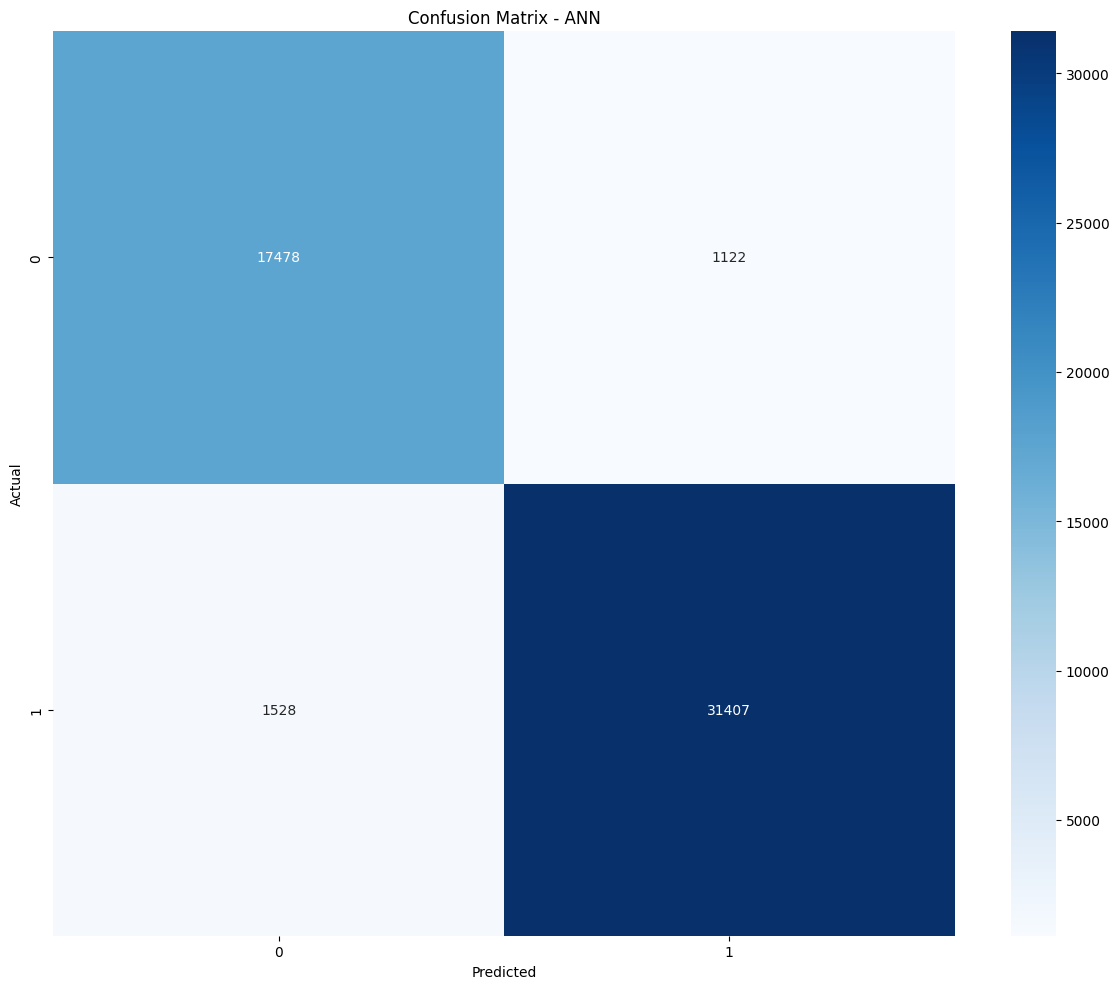


Training and Evaluating: DNN
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9659    0.9401    0.9528     18600
           1     0.9667    0.9813    0.9739     32935

    accuracy                         0.9664     51535
   macro avg     0.9663    0.9607    0.9634     51535
weighted avg     0.9664    0.9664    0.9663     51535



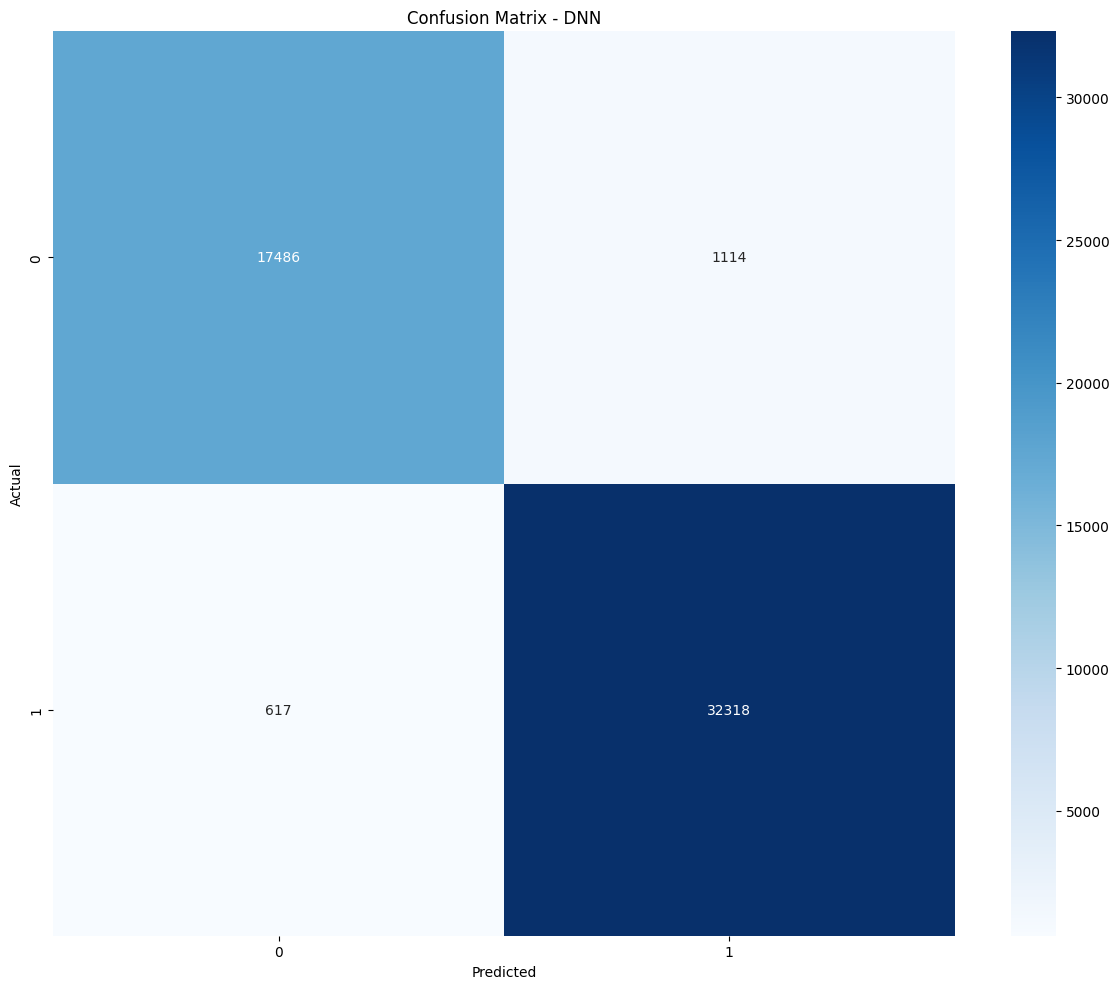


Training and Evaluating: MLP
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9435    0.9450    0.9442     18600
           1     0.9689    0.9680    0.9685     32935

    accuracy                         0.9597     51535
   macro avg     0.9562    0.9565    0.9564     51535
weighted avg     0.9597    0.9597    0.9597     51535



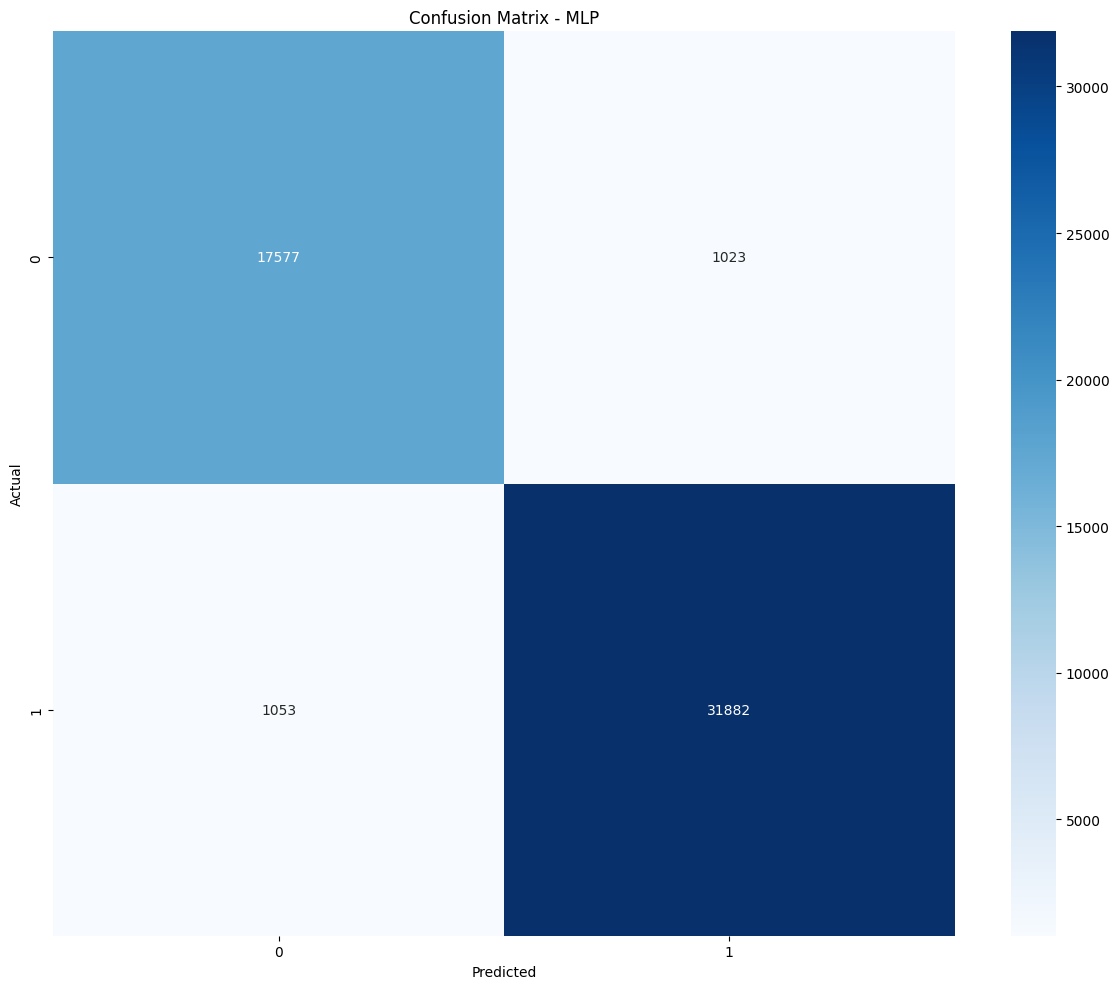


Training and Evaluating: LSTM
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9206    0.9226    0.9216     18600
           1     0.9562    0.9551    0.9556     32935

    accuracy                         0.9433     51535
   macro avg     0.9384    0.9388    0.9386     51535
weighted avg     0.9434    0.9433    0.9434     51535



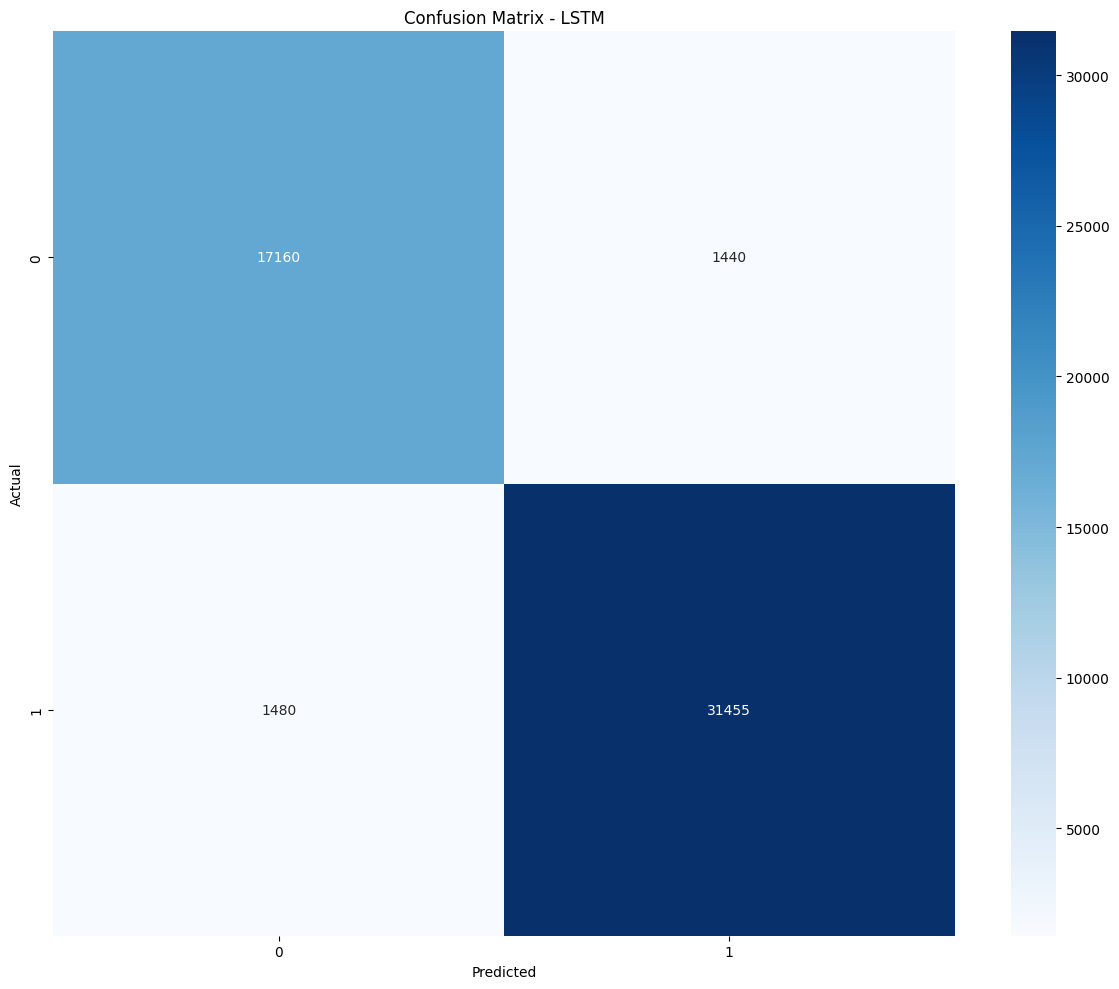


Training and Evaluating: BiLSTM
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9394    0.8945    0.9164     18600
           1     0.9420    0.9674    0.9545     32935

    accuracy                         0.9411     51535
   macro avg     0.9407    0.9310    0.9355     51535
weighted avg     0.9411    0.9411    0.9408     51535



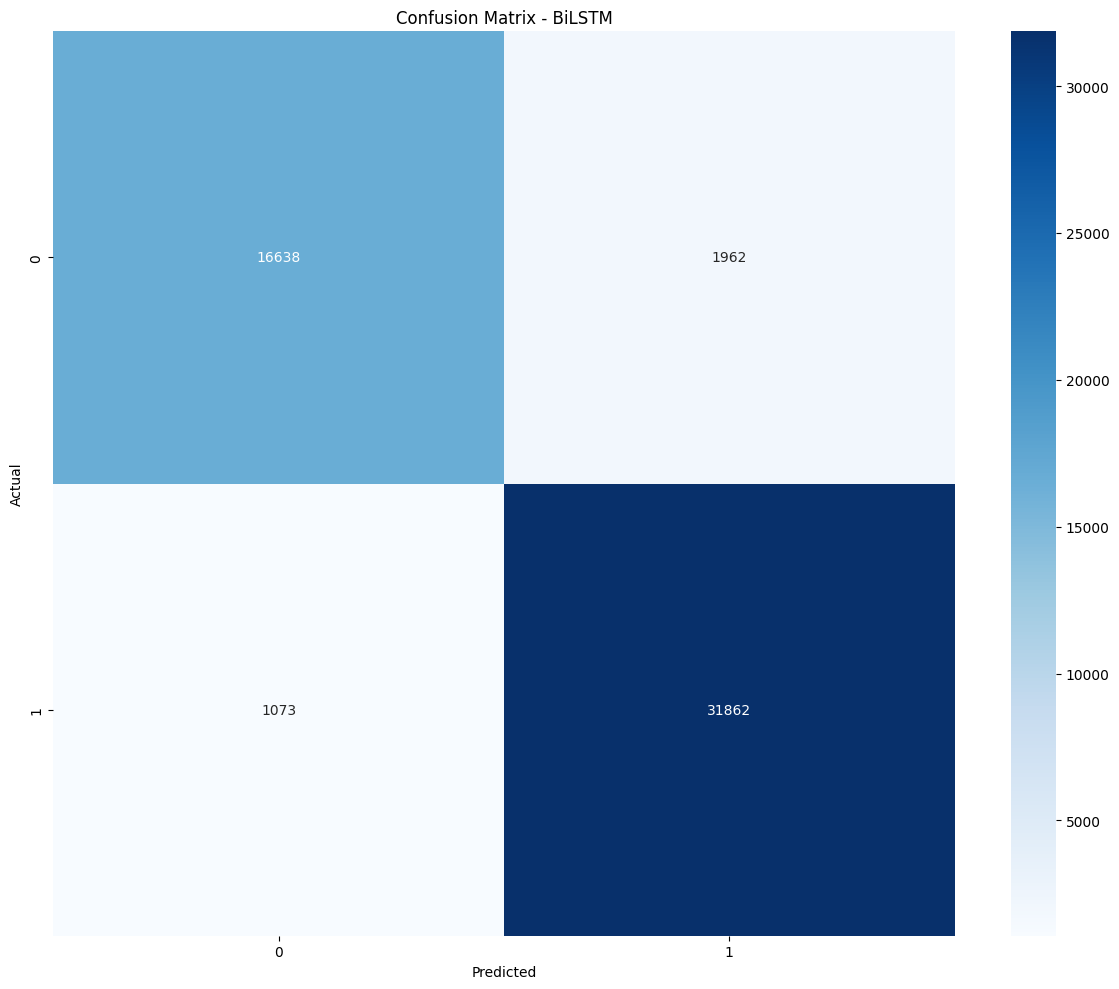


Model Comparison Table:
    Model  Accuracy  Macro Precision  Macro Recall  Macro F1-score
0     DNN  0.966411         0.966298      0.960687        0.963378
1     MLP  0.959717         0.956194      0.956514        0.956354
2     ANN  0.948579         0.942556      0.946642        0.944526
3    LSTM  0.943339         0.938413      0.938822        0.938617
4  BiLSTM  0.941108         0.940705      0.930968        0.935477


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional, Flatten
from tensorflow.keras.utils import to_categorical

# Load dataset
path_train = "../../Data/unsw-nb2015/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv"
path_test = "../../Data/unsw-nb2015/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv"

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)
df = pd.concat([df_train, df_test], ignore_index=True)

# Encode categorical columns
categorical_cols = ['proto', 'service', 'state']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target
le_target = LabelEncoder()
df['label'] = le_target.fit_transform(df['label'].astype(str))

# Prepare features and target
X = df.drop(columns=['attack_cat', 'label'])
y = df['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode target
y_encoded = to_categorical(y)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, stratify=y, random_state=42)

input_shape = X_train.shape[1]
num_classes = y_train.shape[1]

# Define deep learning models
def build_ann():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_dnn():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_mlp():
    model = Sequential([
        Dense(100, activation='relu', input_shape=(input_shape,)),
        Dense(50, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_lstm():
    model = Sequential([
        LSTM(64, input_shape=(1, input_shape)),
        Dense(num_classes, activation='softmax')
    ])
    return model

def build_bilstm():
    model = Sequential([
        Bidirectional(LSTM(64), input_shape=(1, input_shape)),
        Dense(num_classes, activation='softmax')
    ])
    return model

models = {
    "ANN": build_ann(),
    "DNN": build_dnn(),
    "MLP": build_mlp(),
    "LSTM": build_lstm(),
    "BiLSTM": build_bilstm(),
}

results = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    if 'LSTM' in name:
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train.reshape(X_train.shape[0], 1, X_train.shape[1]), y_train, epochs=5, batch_size=128, verbose=0)
        y_pred = model.predict(X_test.reshape(X_test.shape[0], 1, X_test.shape[1]))
    else:
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=0)
        y_pred = model.predict(X_test)

    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    y_test_named = le_target.inverse_transform(y_test_classes)
    y_pred_named = le_target.inverse_transform(y_pred_classes)

    print("Classification Report:")
    report = classification_report(y_test_named, y_pred_named, digits=4, output_dict=True)
    print(classification_report(y_test_named, y_pred_named, digits=4))

    cm = confusion_matrix(y_test_named, y_pred_named, labels=le_target.classes_)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    results.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Macro Precision': report['macro avg']['precision'],
        'Macro Recall': report['macro avg']['recall'],
        'Macro F1-score': report['macro avg']['f1-score']
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True))
